**MTL 782 DATA MINING ASSIGNMENT 2 QUESTION 2**

Use MNIST DATASET
(a) Use the above classifiers to do multi-class classification where the 
idea is to classify the image to one of the ten digits (0-9). [9]
(b) Exploration of Different Evaluation Metrics
Evaluate your methods using different evaluation metrics. Tune the 
parameters using two powerful techniques of grid search and parameter 
search.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [3]:
#Evaluation Metrics
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score,confusion_matrix,classification_report
#Model Select
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing,metrics
from sklearn.pipeline import make_pipeline

In [4]:
from sklearn import datasets, svm, metrics

IMPORTING DATASET

In [5]:
from sklearn.datasets import load_digits
mnist = load_digits()

SPLITTING THE DATASET FOR TRAINING(80%) AND TESTING(20%) 

In [6]:
X_train,X_test,y_train,y_test = train_test_split(mnist.data,mnist.target,random_state=0,test_size=0.2)

**DECISION TREE**

In [7]:
from sklearn import tree
from sklearn import metrics

APPLYING RANDOMIZED SEARCH FOR HYPERPARAMETER TUNING FOR DECISION TREES

In [16]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train) 
X_test_ss = ss.transform(X_test)
param_dist = {"max_depth": [3, 5], 
    "max_features": sp_randint(1, 11), 
    "min_samples_split": sp_randint(2, 11), 
    "criterion": ["gini", "entropy"]} 
# build a classifier 
Dt = DecisionTreeClassifier()
# Randomized search
random_search = RandomizedSearchCV(Dt, param_distributions=param_dist, 
    n_iter=20, cv=5) 
random_search.fit(X_train_ss, y_train)
print(random_search.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 3}


APPLYING GRID SEARCH FOR HYPERPARAMETER TUNING FOR DECISION TREES

In [20]:
criterion = ["gini", "entropy"] 
min_samples_leaf_range = [1,2,3] 
max_leaf_nodes_range = [None, 5, 10, 20]
min_sample_split_range = [1,2,5,10] 
max_depth_range = [None, 2, 5] 
par_grid = {"criterion": criterion,
 "min_samples_split": min_sample_split_range,
 "max_depth": max_depth_range,
 "min_samples_leaf": min_samples_leaf_range,
 "max_leaf_nodes": max_leaf_nodes_range
 }
dt= DecisionTreeClassifier()
grid = GridSearchCV(estimator=dt,param_grid=par_grid,cv = 10,scoring='accuracy',refit=True) 
t_model = make_pipeline(preprocessing.StandardScaler(), grid) 
t_model.fit(X_train, y_train) 
print("Tuned model Accuracy: ", grid.best_score_)
print(grid.best_params_)

Tuned model Accuracy:  0.8593822843822844
{'criterion': 'entropy', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


FROM GRID SEARCH WE GOT THE BEST PARAMETERS NOW WILL USE THEM TO TRAIN OUR MODEL

In [21]:
model_dt = DecisionTreeClassifier(criterion= 'gini', max_depth=None, max_leaf_nodes= None, min_samples_leaf= 1, min_samples_split= 2) 
model_dt.fit(X_train, y_train) 
Y_pred = model_dt.predict(X_test) 
dt_acc=round(accuracy_score(y_test,Y_pred)* 100, 2)
dt_acc_score = round(model_dt.score(X_train, y_train) * 100, 2)
dt_acc

85.0

In [22]:
print(y_pred[0:20],"....")
print(y_test[0:20],"....")

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8] ....
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8] ....


THIS FUNCTION WILL BE USED FOR DOING 5 FOLD VALIDATION ON TRAINING AND TESTING DATA

In [23]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
def cross_validation(model, _X, _y, _cv):
      _scoring =  ['accuracy']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
             "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              }

THIS FUNCTION WILL PLOT THE ACCURACY WE WILL GET IN DIFFERENT FOLDS WHILE DOING 5 FOLD VALIDATION

In [24]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

CALLING THE FUNCTION FOR 5 FOLD VALIDATION AND PRINTING MEAN ACCURACIES

In [25]:
decision_tree_result = cross_validation(model_dt,mnist.data,mnist.target,5)
print(decision_tree_result)

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]), 'Mean Training Accuracy': 100.0, 'Validation Accuracy scores': array([0.77222222, 0.72777778, 0.79108635, 0.83008357, 0.80222841]), 'Mean Validation Accuracy': 78.46796657381616}


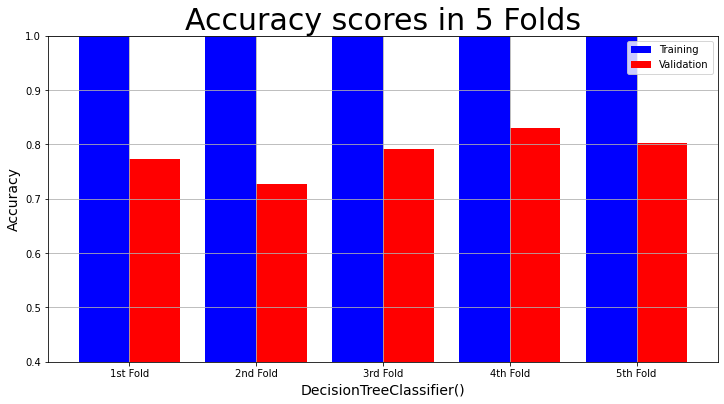

In [26]:
model_name = "Decision Tree"
plot_result(model_dt,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])


In [27]:
k_fold_decisionTree_acc = decision_tree_result["Mean Validation Accuracy"]

CONFUSON MATRIX FOR DECISION TREE MODEL

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print('for Decision Tree, Confusion Matrix:\n',cm)
classify=classification_report(y_test, Y_pred,output_dict=True)
print('for Decision Tree, Classification Report\n',classify)

for Decision Tree, Confusion Matrix:
 [[24  0  0  0  0  1  0  0  0  2]
 [ 0 30  0  3  1  0  0  0  0  1]
 [ 1  0 31  2  0  0  0  0  1  1]
 [ 0  0  0 26  0  0  0  1  0  2]
 [ 1  0  0  0 26  0  2  1  0  0]
 [ 0  0  0  1  1 32  0  1  1  4]
 [ 0  0  0  2  2  0 40  0  0  0]
 [ 0  0  0  0  1  1  0 37  0  0]
 [ 1  3  4  2  0  0  0  2 27  0]
 [ 0  0  0  3  0  3  0  0  2 33]]
for Decision Tree, Classification Report
 {'0': {'precision': 0.8888888888888888, 'recall': 0.8888888888888888, 'f1-score': 0.8888888888888888, 'support': 27}, '1': {'precision': 0.9090909090909091, 'recall': 0.8571428571428571, 'f1-score': 0.8823529411764706, 'support': 35}, '2': {'precision': 0.8857142857142857, 'recall': 0.8611111111111112, 'f1-score': 0.8732394366197184, 'support': 36}, '3': {'precision': 0.6666666666666666, 'recall': 0.896551724137931, 'f1-score': 0.7647058823529411, 'support': 29}, '4': {'precision': 0.8387096774193549, 'recall': 0.8666666666666667, 'f1-score': 0.8524590163934426, 'support': 30}, '5':

In [29]:
DT_precision =  classify['macro avg']['precision'] 
DT_recall = classify['macro avg']['recall']    
DT_f1 = classify['macro avg']['f1-score']
DT_precision = DT_precision*100
DT_precision = round(DT_precision,3)
DT_recall = DT_recall*100
DT_recall = round(DT_recall,3)
DT_f1 = DT_f1*100
DT_f1 = round(DT_f1,3)

**RANDOM** **FOREST** 

APPLYING RANDOMIZED SEARCH CV FOR HYPERPARAMETER TUNING IN RANDOM FOREST MODEL

In [30]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train) 
X_test_ss = ss.transform(X_test)
param_dist = {"max_depth": [3, 5], 
    "max_features": sp_randint(1, 11), 
    "min_samples_split": sp_randint(2, 11), 
    "bootstrap":[True,False],
    "criterion": ["gini", "entropy"]} 
# build a classifier 
Rfc = RandomForestClassifier()
# Randomized search
random_search = RandomizedSearchCV(Rfc, param_distributions=param_dist, 
    n_iter=20, cv=5) 
random_search.fit(X_train_ss, y_train)
print(random_search.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': 5, 'max_features': 8, 'min_samples_split': 2}


APPLYING GRID SEARCH ON RANDOM FOREST FOR HYPERPARAMETER TUNING

In [31]:
criteria = ["gini", "entropy"] 
min_sample_split_range = [2,3] 
min_samples_leaf_range = [1,2,3] 
max_leaf_nodes_range = [None, 5,10] 
param_grid = {
     "criterion": criteria,
    "min_samples_split": min_sample_split_range,
    "min_samples_leaf": min_samples_leaf_range,
    "max_leaf_nodes": max_leaf_nodes_range 
 }
rf = RandomForestClassifier(criterion= criteria, max_leaf_nodes= max_leaf_nodes_range, min_samples_leaf= min_samples_leaf_range, min_samples_split= min_sample_split_range)
grid = GridSearchCV(estimator=rf,
                     param_grid=param_grid, 
                    cv = 5, 
                     scoring='accuracy',
                    refit=True
) 
t_model = make_pipeline(preprocessing.StandardScaler(), grid) 
t_model.fit(X_train, y_train) 
                            
                            
print("Accuracy of the tuned model: ", grid.best_score_)
print(grid.best_params_)

Accuracy of the tuned model:  0.9784286682152536
{'criterion': 'entropy', 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


USING THE BEST PARAMETERS TO TRAIN OUR MODEL OF RANDOM FOREST

In [32]:
rf = RandomForestClassifier(n_estimators=10,criterion= 'entropy', max_depth=None, max_leaf_nodes= None, min_samples_leaf= 1, min_samples_split= 2)
rf.fit(X_train, y_train)
Y_prediction = rf.predict(X_test)
rf_acc=round(accuracy_score(y_test,Y_prediction)* 100, 2)
random_forest_acc_score = round(rf.score(X_train, y_train) * 100, 2)

In [33]:
y_pred = t_model.predict( X_test)
print(metrics.accuracy_score(y_test,y_pred))


0.975


In [34]:
print(y_pred[0:20],'....')
print(y_test[0:20],'....')

[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8] ....
[2 8 2 6 6 7 1 9 8 5 2 8 6 6 6 6 1 0 5 8] ....


USING THE PREDEFINED 5 FOLD CROSS VALIDATION FUNCTION TO CALCULATE THE ACCURACIES

In [35]:
Random_Forest_result = cross_validation(rf,mnist.data,mnist.target,5)
print(Random_Forest_result)

{'Training Accuracy scores': array([0.99860821, 0.99860821, 1.        , 1.        , 0.99930459]), 'Mean Training Accuracy': 99.93042025623231, 'Validation Accuracy scores': array([0.90277778, 0.86944444, 0.93314763, 0.93593315, 0.89972145]), 'Mean Validation Accuracy': 90.82048901268956}


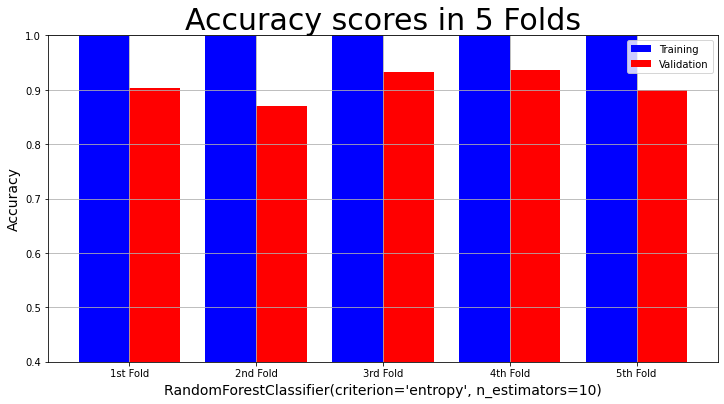

In [36]:
model_name = "Random Forest"
plot_result(rf,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Random_Forest_result["Training Accuracy scores"],
            Random_Forest_result["Validation Accuracy scores"])

In [37]:
k_fold_RF_acc = Random_Forest_result["Mean Validation Accuracy"]

CONFUSION MATRIX FOR RANDOM FOREST MODEL

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('for Random Forest, Confusion Matrix:\n',cm)
classify=classification_report(y_test, y_pred,output_dict=True)
print('for Random Forest, Classification Report\n',classify)

for Random Forest, Confusion Matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 1  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  1 37  0]
 [ 0  0  0  1  0  1  0  0  0 39]]
for Random Forest, Classification Report
 {'0': {'precision': 0.9642857142857143, 'recall': 1.0, 'f1-score': 0.9818181818181818, 'support': 27}, '1': {'precision': 0.9444444444444444, 'recall': 0.9714285714285714, 'f1-score': 0.9577464788732395, 'support': 35}, '2': {'precision': 1.0, 'recall': 0.9444444444444444, 'f1-score': 0.9714285714285714, 'support': 36}, '3': {'precision': 0.9666666666666667, 'recall': 1.0, 'f1-score': 0.983050847457627, 'support': 29}, '4': {'precision': 1.0, 'recall': 0.9666666666666667, 'f1-score': 0.983050847457627, 'support': 30}, '5': {'precision': 0.9512195121951219, 'recall': 0.975, 'f1-score

In [39]:
RF_precision =  classify['macro avg']['precision'] 
RF_recall = classify['macro avg']['recall']    
RF_f1 = classify['macro avg']['f1-score']
RF_precision = RF_precision*100
RF_precision = round(RF_precision,3)
RF_recall = RF_recall*100
RF_recall = round(RF_recall,3)
RF_f1 = RF_f1*100
RF_f1 = round(RF_f1,3)

**KNN**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

VARYING VALUE OF K IN KNN AND PLOTTING A GRAPH TO REPRESENT ACCURACY SCORES FOR DIFFERENT K

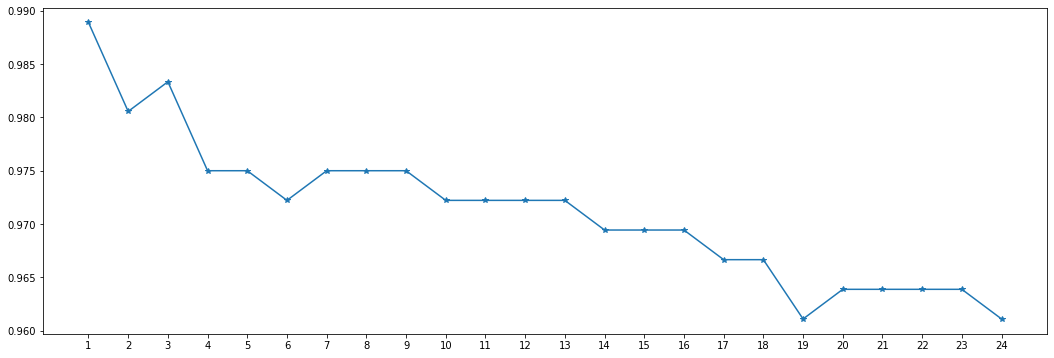

In [41]:
plt.subplots(figsize=(18,6))
n_index=list(range(1,25))
n = pd.Series([],dtype=pd.StringDtype()) 
x=range(1,25)
for i in list(range(1,25)):
 knn_model=KNeighborsClassifier(n_neighbors=i) 
 knn_model.fit(X_train, y_train) 
 pred=knn_model.predict(X_test)
 n=n.append(pd.Series(accuracy_score(y_test,pred)))
plt.plot(n_index, n,marker="*")
plt.xticks(x)
plt.show()

In [42]:
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [43]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


APPLYING RANDOMIZED SEARCH CV FOR HYPERPARAMETER TUNING IN KNN

In [47]:
knn=KNeighborsClassifier()
rand = RandomizedSearchCV(knn, param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
rand.fit(X_train, y_train)
rand.cv_results_

{'mean_fit_time': array([0.00247924, 0.00212793, 0.00331521, 0.00289419, 0.00222776,
        0.00152218, 0.00267165, 0.00143127, 0.00268695, 0.00145857]),
 'std_fit_time': array([0.00183489, 0.00131194, 0.00307805, 0.00266601, 0.00181668,
        0.00030497, 0.002609  , 0.00011622, 0.00390186, 0.00019394]),
 'mean_score_time': array([0.02054925, 0.04275179, 0.04191763, 0.02426534, 0.02964807,
        0.01802738, 0.0238729 , 0.016786  , 0.01786993, 0.04164677]),
 'std_score_time': array([0.01522173, 0.05100941, 0.03681045, 0.02134276, 0.03729746,
        0.00583345, 0.01966589, 0.01014378, 0.00890258, 0.03785992]),
 'param_n_neighbors': masked_array(data=[12, 30, 24, 26, 19, 11, 3, 14, 27, 22],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 12},
  {'n_neighbors': 30},
  {'n_neighbors': 24},
  {'n_neighbors': 26},
  {'n_neighbors': 19},
  {'n_nei

In [48]:
print(rand.best_score_)
print(rand.best_params_)

0.9867618492618492
{'n_neighbors': 3}


APPLYING GRID SEARCH CV FOR HYPERPARAMETER TUNING IN KNN

In [49]:
grid = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(mnist.data, mnist.target)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=24),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

THESE ARE THE SCORES WE GOT AS WE VARIED PARAMETERS IN GRID SEARCH CV

In [50]:
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.97496276 0.9744072  0.97663253 0.97218187 0.97162942 0.96828988
 0.96773433 0.96494413 0.96494413 0.96216325 0.96382682 0.96438858
 0.96327126 0.96326816 0.96215705 0.96216015 0.96159839 0.9627157
 0.96215705 0.95882371 0.95937616 0.95882371 0.95882371 0.95714773
 0.95492241 0.95492551 0.95437306 0.95437616 0.95103973 0.94824953]


THESE ARE THE BEST PARAMETERS AFTER COMPILING THE RESULTS

In [51]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9766325263811299
{'n_neighbors': 3}
KNeighborsClassifier(n_neighbors=3)


USING THE BEST PARAMETERS TO TRAIN OUR MODEL

In [52]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
Y_pred = knn_model.predict(X_test)
knn_acc=round(accuracy_score(y_test,Y_pred)* 100, 2)
knn_acc_score = round(knn_model.score(X_train, y_train) * 100, 2)

DOING 5 FOLD VALIDAION TAKING ACCURACY AS A PARAMETER

In [53]:
KNN_result = cross_validation(knn_model,mnist.data,mnist.target,5)
print(KNN_result)

{'Training Accuracy scores': array([0.99304106, 0.99443285, 0.99235049, 0.99443672, 0.99374131]), 'Mean Training Accuracy': 99.36004831577144, 'Validation Accuracy scores': array([0.95555556, 0.95833333, 0.96657382, 0.98607242, 0.96657382]), 'Mean Validation Accuracy': 96.6621788919839}


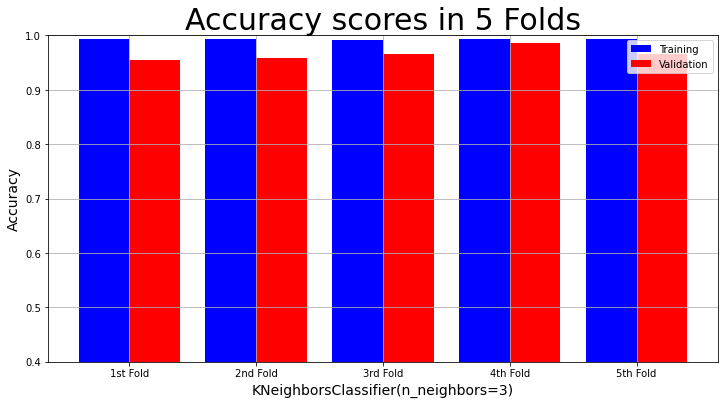

In [54]:
model_name = "KNN"
plot_result(knn_model,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            KNN_result["Training Accuracy scores"],
            KNN_result["Validation Accuracy scores"])

In [55]:
k_fold_KNN_acc =  KNN_result["Mean Validation Accuracy"]

CONFUSION MATRIX FOR KNN MODEL

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print('for KNN, Confusion Matrix:\n',cm)
classify=classification_report(y_test, Y_pred,output_dict=True)
print('for KNN, Classification Report\n',classify)

for KNN, Confusion Matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  1  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  1 28  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  0  0  2  0  0  0  0 37  0]
 [ 0  0  0  0  0  0  0  0  0 41]]
for KNN, Classification Report
 {'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 27}, '1': {'precision': 1.0, 'recall': 0.9714285714285714, 'f1-score': 0.9855072463768115, 'support': 35}, '2': {'precision': 0.972972972972973, 'recall': 1.0, 'f1-score': 0.9863013698630138, 'support': 36}, '3': {'precision': 0.9333333333333333, 'recall': 0.9655172413793104, 'f1-score': 0.9491525423728815, 'support': 29}, '4': {'precision': 1.0, 'recall': 0.9666666666666667, 'f1-score': 0.983050847457627, 'support': 30}, '5': {'precision': 0.975, 'recall': 0.975, 'f1-score': 0.975, 'support': 40}, '6': {'precision': 1.0, 'recall': 1.0

In [58]:
KNN_precision =  classify['macro avg']['precision'] 
KNN_recall = classify['macro avg']['recall']    
KNN_f1 = classify['macro avg']['f1-score']
KNN_precision = KNN_precision*100
KNN_precision = round(KNN_precision,3)
KNN_recall = KNN_recall*100
KNN_recall = round(KNN_recall,3)
KNN_f1 = KNN_f1*100
KNN_f1 = round(KNN_f1,3)

**NAIVE BAYES**

APPLYING GRID SEARCH CV FOR HYPERPARAMETER TUNING FOR NAIVE BAYES

In [59]:
var_smoothing=[1e-9,1e-8,1e-7]
par_grid = {"var_smoothing": var_smoothing}
nb=GaussianNB()
grid = GridSearchCV(estimator=nb,param_grid=par_grid,cv = 5,scoring='accuracy',refit=True) 
t_model = make_pipeline(preprocessing.StandardScaler(), grid) 
t_model.fit(X_train, y_train) 
print("Tuned model Accuracy: ", grid.best_score_)
print(grid.best_params_)
print(grid.best_score_)

Tuned model Accuracy:  0.8204631242740998
{'var_smoothing': 1e-07}
0.8204631242740998


USING THE BEST PARAMETERS WE GOT TO TRAIN OUR MODEL

In [60]:
nb = GaussianNB(var_smoothing=1e-7)
nb.fit(X_train, y_train)
Y_pred = nb.predict(X_test) 
nb_acc=round(accuracy_score(y_test,Y_pred)* 100, 2)
gaussian_acc_score = round(nb.score(X_train, y_train) * 100, 2)
print(nb_acc)
print(gaussian_acc_score)

85.83
88.94


USING THE PREDEFINED FUNCTION TO CALCULATE ACCURACIES ON 5 FOLD VALIDATION

In [61]:
Naive_Bayes_result = cross_validation(nb,mnist.data,mnist.target,5)
print(Naive_Bayes_result)

{'Training Accuracy scores': array([0.89909534, 0.90953375, 0.89707928, 0.87552156, 0.90959666]), 'Mean Training Accuracy': 89.8165316980303, 'Validation Accuracy scores': array([0.83333333, 0.79722222, 0.81337047, 0.89415042, 0.82451253]), 'Mean Validation Accuracy': 83.251779634788}


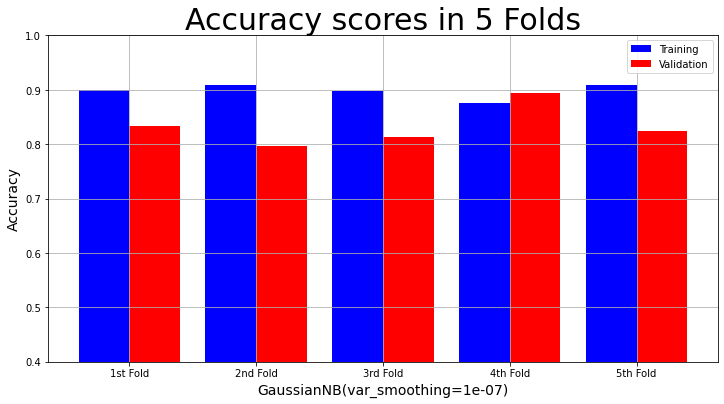

In [62]:
model_name = "Naive Bayes"
plot_result(nb,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            Naive_Bayes_result["Training Accuracy scores"],
            Naive_Bayes_result["Validation Accuracy scores"])

In [63]:
k_fold_NB_acc =  Naive_Bayes_result["Mean Validation Accuracy"]

CONFUSION MATRIX FOR NAIVE BAYES MODEL

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print('for Naive Bayes, Confusion Matrix:\n',cm)
classify=classification_report(y_test, Y_pred,output_dict=True)
print('for Naive Bayes, Classification Report\n',classify)

for Naive Bayes, Confusion Matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  5  1]
 [ 0  6 21  2  0  0  0  0  7  0]
 [ 0  0  1 24  0  0  0  0  4  0]
 [ 0  1  0  0 27  0  0  2  0  0]
 [ 0  1  0  0  0 36  0  2  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  3  0  0  0  1  0  1 34  0]
 [ 0  1  0  3  0  0  0  3  6 28]]
for Naive Bayes, Classification Report
 {'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 27}, '1': {'precision': 0.7073170731707317, 'recall': 0.8285714285714286, 'f1-score': 0.7631578947368421, 'support': 35}, '2': {'precision': 0.9545454545454546, 'recall': 0.5833333333333334, 'f1-score': 0.7241379310344828, 'support': 36}, '3': {'precision': 0.8275862068965517, 'recall': 0.8275862068965517, 'f1-score': 0.8275862068965517, 'support': 29}, '4': {'precision': 1.0, 'recall': 0.9, 'f1-score': 0.9473684210526316, 'support': 30}, '5': {'precision': 0.972972972972973, 'recall': 0.9, 'f1-score': 0.935064935064935

In [65]:
NB_precision =  classify['macro avg']['precision'] 
NB_recall = classify['macro avg']['recall']    
NB_f1 = classify['macro avg']['f1-score']
NB_precision = NB_precision*100
NB_precision = round(NB_precision,3)
NB_recall = NB_recall*100
NB_recall = round(NB_recall,3)
NB_f1 = NB_f1*100
NB_f1 = round(NB_f1,3)

**SVM**

In [66]:
from sklearn.svm import SVC

In [67]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 

APPLYING RANDOMIZED SEARCH CV FOR HYPERPARAMETER TUNING OF SVM CLASSIFIER

In [68]:
SVM_Classifier = RandomizedSearchCV(SVC(), param_grid, cv=10, scoring='accuracy', n_iter=10, random_state=5)
SVM_Classifier.fit(X_train, y_train)
SVM_Classifier.cv_results_

{'mean_fit_time': array([0.05635064, 0.12332172, 0.2144876 , 0.24275527, 0.22296138,
        0.24536843, 0.0504226 , 0.24794931, 0.20565717, 0.22641654]),
 'std_fit_time': array([0.00710942, 0.03653296, 0.05013292, 0.00528097, 0.00490674,
        0.05395248, 0.0016792 , 0.05990965, 0.00528537, 0.00588746]),
 'mean_score_time': array([0.01380088, 0.02321231, 0.02141724, 0.02107091, 0.01888461,
        0.02328212, 0.01175199, 0.02247381, 0.01872723, 0.02024641]),
 'std_score_time': array([0.00415057, 0.01018158, 0.00530879, 0.00302951, 0.00084359,
        0.0053811 , 0.00027759, 0.0062607 , 0.00060791, 0.00027832]),
 'param_kernel': masked_array(data=['rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf',
                    'rbf', 'rbf'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.0001, 0.001, 0.01, 1, 0.1, 0.01, 0.0001, 0.01, 0.01

In [69]:
print(SVM_Classifier.best_score_)
print(SVM_Classifier.best_params_)

0.9902534965034965
{'kernel': 'rbf', 'gamma': 0.001, 'C': 100}


APPLYING GRID SEARCH CV FOR HYPERPARAMETER TUNING FOR SVM

In [70]:
 grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 0)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

PRINTING THE BEST PARAMETERS

In [71]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=1, gamma=0.001)


TRAINING OUR MODEL USING THE BEST PARAMETERS WE GOT

In [72]:
svm_model = SVC(kernel = 'rbf', random_state = 0,C=1, gamma=0.001)
svm_model.fit(X_train, y_train)
Y_pred = svm_model.predict(X_test) 
svm_acc=round(accuracy_score(y_test,Y_pred)* 100, 2)
svm_acc_score = round(svm_model.score(X_train, y_train) * 100, 2)

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print(cm)
accuracy_score(y_test,Y_pred)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


0.9916666666666667

APPLYING 5 FOLD VALIDATION TO OUR SVM MODEL 

In [74]:
SVM_result = cross_validation(svm_model,mnist.data,mnist.target,5)
print(SVM_result)

{'Training Accuracy scores': array([0.99930411, 0.99860821, 0.99860918, 0.99860918, 0.99930459]), 'Mean Training Accuracy': 99.8887053173481, 'Validation Accuracy scores': array([0.975     , 0.95      , 0.98328691, 0.99164345, 0.96100279]), 'Mean Validation Accuracy': 97.21866295264624}


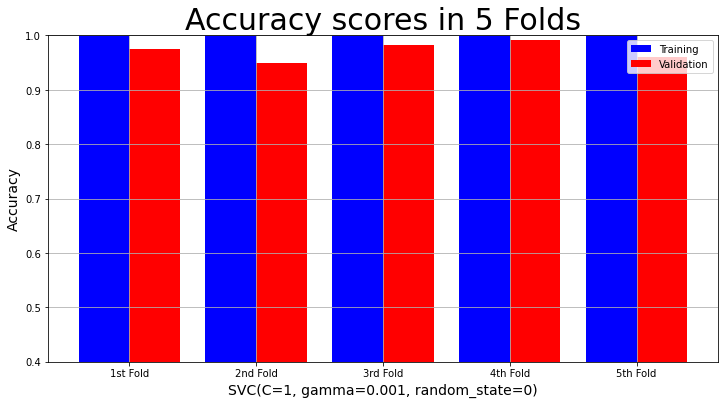

In [75]:
model_name = "SVM"
plot_result(svm_model,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            SVM_result["Training Accuracy scores"],
            SVM_result["Validation Accuracy scores"])

In [76]:
k_fold_SVM_acc = SVM_result["Mean Validation Accuracy"]

CONFUSION MATRIX FOR SVM MODEL

In [77]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, Y_pred)
print('for SVM, Confusion Matrix:\n',cm)
classify=classification_report(y_test, Y_pred,output_dict=True)
print('for SVM, Classification Report\n',classify)

for SVM, Confusion Matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  0  0 40]]
for SVM, Classification Report
 {'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 27}, '1': {'precision': 0.9722222222222222, 'recall': 1.0, 'f1-score': 0.9859154929577464, 'support': 35}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 36}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 29}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 30}, '5': {'precision': 0.975, 'recall': 0.975, 'f1-score': 0.975, 'support': 40}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 44}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3

In [78]:
SVM_precision =  classify['macro avg']['precision'] 
SVM_recall = classify['macro avg']['recall']    
SVM_f1 = classify['macro avg']['f1-score']
SVM_precision = SVM_precision*100
SVM_precision = round(SVM_precision,3)
SVM_recall = SVM_recall*100
SVM_recall = round(SVM_recall,3)
SVM_f1 = SVM_f1*100
SVM_f1 = round(SVM_f1,3)

**ANN**

In [79]:
import tensorflow as tf
import keras
from tensorflow.python.keras.layers import Input, Dense
from tensorflow.keras.utils import to_categorical

In [80]:
from tensorflow.python.keras.models import Sequential

CREATE MODEL FUNCTION FOR ANN MODEL GENERATION

In [81]:
def create_model(optimizer="adam"):
    # create model
    model = Sequential()
    model.add(Dense(20, activation='relu'))
    
    model.add(Dense(40, activation='sigmoid'))
    model.add(Dense(60, activation='relu'))

    
    model.add(Dense(10, activation='softmax')) 
    model.compile(loss='categorical_crossentropy', optimizer=optimizer,metrics=["accuracy"])
    return model
model = create_model() 

CONVERTING MULTI CLASS OUTPUT TO CATEGORICAL DATA FOR USING IN ANN MODEL

In [82]:
y1 = to_categorical(y_train)
y2 = to_categorical(y_test)

In [83]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
classifier = KerasClassifier(build_fn = create_model)
parameters = dict(batch_size= [16, 32, 64, 128],
              epochs= [100, 150],
              optimizer= ['adam'])

APPLYING RANDOMIZEDSEARCH CV FOR HYPERPARAMETER TUNING IN ANN MODEL

In [89]:
ANN_Classifier = RandomizedSearchCV(classifier, parameters, cv=5, scoring='accuracy', n_iter=10, random_state=5)
ANN_Classifier.fit(X_train, y_train,verbose = 0)
ANN_Classifier.cv_results_

{'mean_fit_time': array([27.53256831, 20.35191913,  8.34985981, 12.99457107,  5.26507235,
         8.06311893,  3.4672019 ,  5.38039069]),
 'std_fit_time': array([11.44710246,  1.22466556,  1.6642567 ,  4.16798047,  0.60925076,
         2.39287501,  1.36170763,  0.86667244]),
 'mean_score_time': array([0.20540376, 0.1400074 , 0.13860173, 0.14971986, 0.14797497,
        0.16834087, 0.12793984, 0.15323033]),
 'std_score_time': array([0.11159989, 0.00827239, 0.02378198, 0.02024325, 0.00395854,
        0.04308032, 0.01464293, 0.00972421]),
 'param_optimizer': masked_array(data=['adam', 'adam', 'adam', 'adam', 'adam', 'adam', 'adam',
                    'adam'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_epochs': masked_array(data=[100, 150, 100, 150, 100, 150, 100, 150],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),

In [90]:
print(ANN_Classifier.best_score_)
print(ANN_Classifier.best_params_)

0.9742523228803716
{'optimizer': 'adam', 'epochs': 150, 'batch_size': 16}


APPLYING GRID SEARCH CV FOR HYPERPARAMETER TUNING IN ANN MODEL

In [ ]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid = grid_search.fit(X_train, y1,verbose=0)

In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

Best Parameters: {'batch_size': 16, 'epochs': 100, 'optimizer': 'adam'}


USING THE BEST PARAMETERS FOR TRAINING OUR ANN MODEL

In [ ]:
train=model.fit(X_train, y1, epochs=100, batch_size=16,verbose=0,validation_data=(X_test,y2))

PLOTTING THE LOSS FUNCTION DURING TRAINING OF THE ANN MODEL

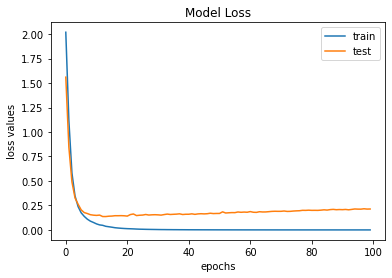

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train.history['loss'], label='train')
plt.plot(train.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()

PLOTTING ACCURACY FUNCTION DURING TRAINING OF ANN MODEL

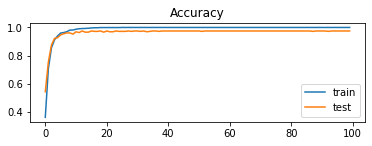

In [ ]:
plt.subplot(212)
plt.title('Accuracy')
plt.plot(train.history['accuracy'], label='train')
plt.plot(train.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
train_acc = model.evaluate(X_train,y1, verbose=0)
test_acc = model.evaluate(X_test,y2, verbose=0)
Y_pred = model.predict(X_test)
ANN_train_acc = train_acc[1]*100
ANN_test_acc = test_acc[1]*100
ANN_test_acc = round(ANN_test_acc,3)
ANN_test_acc

97.5

CONFUSION MATRIX FOR ANN MODEL

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y3=np.argmax(Y_pred, axis=1)
y4=np.argmax(y2, axis=1)
cm = confusion_matrix(y4, y3)
print('for ANN, Confusion Matrix:\n',cm)
classify=classification_report(y4, y3,output_dict=True)
print('for ANN, Classification Report\n',classify)

for ANN, Confusion Matrix:
 [[27  0  0  0  0  0  0  0  0  0]
 [ 1 33  0  0  0  0  0  0  0  1]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  1  0  0  0  0]
 [ 0  0  0  0 30  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  1]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  1  0  0  0  0  0  0 38  0]
 [ 0  0  0  0  0  1  0  1  0 39]]
for ANN, Classification Report
 {'0': {'precision': 0.9642857142857143, 'recall': 1.0, 'f1-score': 0.9818181818181818, 'support': 27}, '1': {'precision': 0.9428571428571428, 'recall': 0.9428571428571428, 'f1-score': 0.9428571428571428, 'support': 35}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 36}, '3': {'precision': 1.0, 'recall': 0.9655172413793104, 'f1-score': 0.9824561403508771, 'support': 29}, '4': {'precision': 0.967741935483871, 'recall': 1.0, 'f1-score': 0.9836065573770492, 'support': 30}, '5': {'precision': 0.9512195121951219, 'recall': 0.975, 'f1-score': 0.9629629629629629, 'support': 40}, '6': {'pre

In [ ]:
ANN_precision =  classify['macro avg']['precision'] 
ANN_recall = classify['macro avg']['recall']    
ANN_f1 = classify['macro avg']['f1-score']
ANN_precision = ANN_precision*100
ANN_precision = round(ANN_precision,3)
ANN_recall = ANN_recall*100
ANN_recall = round(ANN_recall,3)
ANN_f1 = ANN_f1*100
ANN_f1 = round(ANN_f1,3)

**COMPARISON OF MODELS**

*BASED ON ACCURACY*

In [ ]:
best = pd.DataFrame({
    'Model': [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN'],
    'Score': [ knn_acc_score,random_forest_acc_score,gaussian_acc_score,dt_acc_score,svm_acc_score,ANN_train_acc],
    "Acc_score":[knn_acc,rf_acc,nb_acc,dt_acc,svm_acc,ANN_test_acc]
 })
best_df = best.sort_values(by='Acc_score', ascending=False)

best_df = best_df.reset_index(drop=True)

best_df.head(6)

,Model,Score,Acc_score
0,SVM,99.93,99.17
1,KNN,99.10,98.33
2,ANN,100.00,97.50
3,Random Forest,100.00,95.00
4,Naive Bayes,88.94,85.83
5,Decision Tree,100.00,85.00


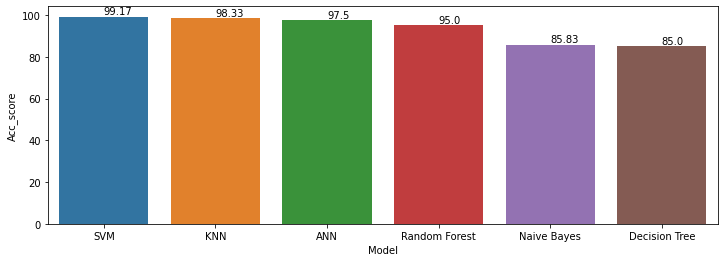

In [ ]:
plt.subplots(figsize=(12,4))
ax=sns.barplot(x='Model',y="Acc_score",data=best_df)
labels = (best_df["Acc_score"])
for i,j in enumerate(labels):
 ax.text(i,j+1,str(j))

*This Tells us that Based on Accuracy : SVM is the best performing model and Decision Tree is the worst on the MNIST Dataset.*

*BASED ON PRECISION*

In [ ]:
best = pd.DataFrame({
    'Model': [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN'],
    "Precision":[KNN_precision,RF_precision,NB_precision,DT_precision,SVM_precision,ANN_precision]
 })
best_df = best.sort_values(by='Precision', ascending=False)

best_df = best_df.reset_index(drop=True)

best_df.head(6)

,Model,Precision
0,SVM,99.228
1,KNN,98.325
2,ANN,97.517
3,Random Forest,96.700
4,Naive Bayes,88.327
5,Decision Tree,85.000


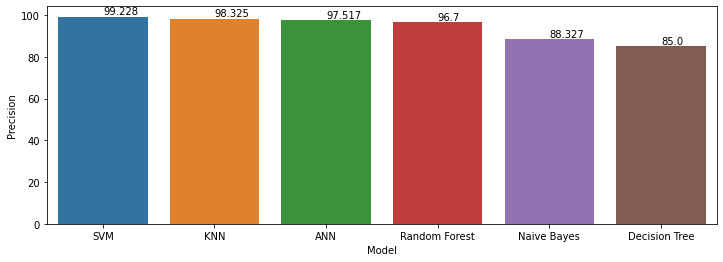

In [ ]:
plt.subplots(figsize=(12,4))
ax=sns.barplot(x='Model',y="Precision",data=best_df)
labels = (best_df["Precision"])
for i,j in enumerate(labels):
 ax.text(i,j+1,str(j))

*BASED ON RECALL*

In [ ]:
best = pd.DataFrame({
    'Model': [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN'],
    "Recall":[KNN_recall,RF_recall,NB_recall,DT_recall,SVM_recall,ANN_recall]
 })
best_df = best.sort_values(by='Recall', ascending=False)

best_df = best_df.reset_index(drop=True)

best_df.head(6)

,Model,Recall
0,SVM,99.250
1,KNN,98.273
2,ANN,97.606
3,Random Forest,96.824
4,Naive Bayes,85.942
5,Decision Tree,85.281


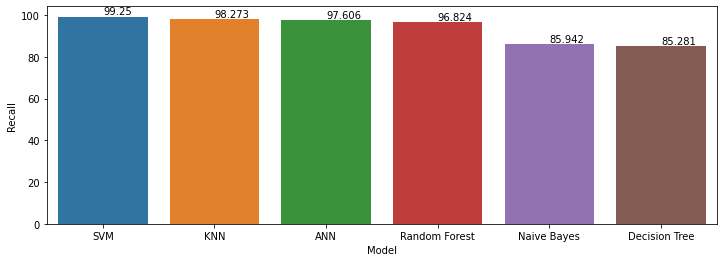

In [ ]:
plt.subplots(figsize=(12,4))
ax=sns.barplot(x='Model',y="Recall",data=best_df)
labels = (best_df["Recall"])
for i,j in enumerate(labels):
 ax.text(i,j+1,str(j))

*BASED ON F1_Score*

In [ ]:
best = pd.DataFrame({
    'Model': [ 'KNN','Random Forest','Naive Bayes','Decision Tree','SVM','ANN'],
    "F1_Score":[KNN_f1,RF_f1,NB_f1,DT_f1,SVM_f1,ANN_f1]
 })
best_df = best.sort_values(by='F1_Score', ascending=False)

best_df = best_df.reset_index(drop=True)

best_df.head(6)

,Model,F1_Score
0,SVM,99.235
1,KNN,98.280
2,ANN,97.548
3,Random Forest,96.701
4,Naive Bayes,86.088
5,Decision Tree,84.972


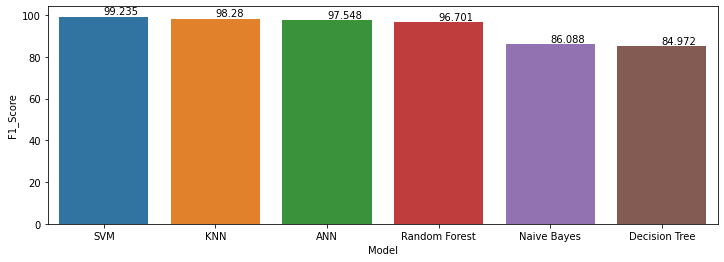

In [ ]:
plt.subplots(figsize=(12,4))
ax=sns.barplot(x='Model',y="F1_Score",data=best_df)
labels = (best_df["F1_Score"])
for i,j in enumerate(labels):
 ax.text(i,j+1,str(j))